In [1]:
import pandas as pd
import os
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv("../imgData.csv", sep = ",")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df = df.drop_duplicates(subset = ['id'])
#df = df.groupby('checksum').count()
df.head()

,id,creatorID,header_text,comment_count,upvotes,downvotes,imgSrc,checksum
0,jsid-post-amA5b7d,catlicking,Climate change denier gets demolished.,1K,12K,868,https://img-9gag-fun.9cache.com/photo/amA5b7d_...,52520435385a3e456993e72ef362c0b4838f518f73c5f9...
1,jsid-post-aWGxB3K,happysadddd,German police protect bucket-wheel-excavator f...,301,1.5K,96,https://img-9gag-fun.9cache.com/photo/aWGxB3K_...,487cddfbff8cbc65cbe89f97b03cf630549d9cd78eba25...
2,jsid-post-aDYgErK,opm741,No one will see this.,162,1K,238,https://img-9gag-fun.9cache.com/photo/aDYgErK_...,da6e120bdb8e228b37044bbefcaa90e6661736454f7e82...
3,jsid-post-aGEZOwK,fukcommies,It must have been climate change!,794,6.2K,595,https://img-9gag-fun.9cache.com/photo/aGEZOwK_...,1a1f8e36cf2c8a9cb2ee1a9a7b75de12d9e9edbf2d3a0d...
8,jsid-post-ago5LPK,andersonknight,Climate,20,399,85,https://img-9gag-fun.9cache.com/photo/ago5LPK_...,da6521be6c16ff34503785f031092f641fb871ce3622ac...


In [2]:
os.listdir("..\images")

file_list = []

for f in os.listdir("..\images"):
    if "." in f:
        new_filename = f.split(".")[0]
        #print(new_filename)
        file_list.append(new_filename)

In [3]:
df = df[df['id'].isin(file_list)]
df.head()

,id,creatorID,header_text,comment_count,upvotes,downvotes,imgSrc,checksum
2,jsid-post-aDYgErK,opm741,No one will see this.,162,1K,238,https://img-9gag-fun.9cache.com/photo/aDYgErK_...,da6e120bdb8e228b37044bbefcaa90e6661736454f7e82...
8,jsid-post-ago5LPK,andersonknight,Climate,20,399,85,https://img-9gag-fun.9cache.com/photo/ago5LPK_...,da6521be6c16ff34503785f031092f641fb871ce3622ac...
10,jsid-post-ap95jWb,shadowmose,"The ""Don't look up"" syndrom",531,1K,1K,https://img-9gag-fun.9cache.com/photo/ap95jWb_...,db79434cbcc0d9d4ca60c63cb004cb1b31070f0184ca1c...
14,jsid-post-az21BYm,walkingfishhh,A handy guide,98,84,134,https://img-9gag-fun.9cache.com/photo/az21BYm_...,c878faa6a8d9aa20c0ac5d167412d5af130046865070c9...
15,jsid-post-a2Kox39,9GAGGER,Glued to the street and cut out by police. Her...,761,10K,761,https://img-9gag-fun.9cache.com/photo/a2Kox39_...,a99c85c1e9b92540b2f1c67e904d4da89546cb85bb9a8c...


In [4]:
df['header_text'].to_excel("header_texts.xlsx", index = False)

text = df['header_text'].to_string(header = False, index = False)
text = text.replace("’", "'")

In [5]:
#create stop words 
stopwords = set(STOPWORDS)
stopwords.update(["s", "t", "us", "f", "Don"])
#call the wordcloud Constructor 
WC = WordCloud(stopwords = stopwords, max_words = 35, background_color = "white", width = 1920, height = 1080).generate(df['header_text'].to_string())

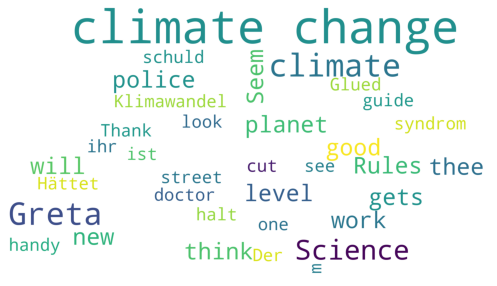

In [6]:
fig = plt.figure(figsize = (10,5))

plt.imshow(WC)
plt.axis("off")
#plt.show()
plt.savefig("wordcloud_test.png", dpi = 300)

In [8]:
#df[['id','comment_count', 'upvotes', 'downvotes']].to_excel("id_and_votes.xlsx", index = False)